In [50]:
import pandas as pd
import numpy as np
import ast
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # poner este como metrica
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
dfmerge = pd.read_csv('/content/drive/MyDrive/merged_data6.csv')

dfmerge.head()

,id,title,score_final,Drama,Comedy,Horror,Romance
0,862,Toy Story,1638.55,0,1,0,0
1,8844,Jumanji,735.17,0,0,0,0
2,15602,Grumpier Old Men,36.06,0,1,0,1
3,31357,Waiting to Exhale,14.57,1,1,0,1
4,11862,Father of the Bride Part II,58.37,0,1,0,0


**'id': Representa el identificador de la película.
'title': Es el título de la película.
'score_final': Es el puntaje final asignado a la película.
'Drama', 'Comedy', 'Horror', 'Romance': Son columnas de tipo entero que indican si la película pertenece a los respectivos géneros. Un valor de 1 indica que la película pertenece al género correspondiente, mientras que un valor de 0 indica lo contrario.
El DataFrame tiene un total de 43,515 filas y las columnas 'id', 'score_final', 'Drama', 'Comedy', 'Horror' y 'Romance' no tienen valores nulos. Sin embargo, la columna 'title' tiene algunos valores nulos, con 43,097 valores no nulos.**

In [53]:
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43515 entries, 0 to 43514
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           43515 non-null  int64  
 1   title        43097 non-null  object 
 2   score_final  43515 non-null  float64
 3   Drama        43515 non-null  int64  
 4   Comedy       43515 non-null  int64  
 5   Horror       43515 non-null  int64  
 6   Romance      43515 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.3+ MB


¿Cuáles son los géneros más comunes en las películas con alto score final?

¿Existen correlaciones entre el género de una película y su score final?

¿Cómo se distribuye el score final en los diferentes géneros de películas?

¿Existen películas con géneros poco comunes pero que tienen un score final alto?

¿Cuáles son los géneros más populares entre las películas con bajo score final?


¿Cuál es la película con más calificaciones?¿Cuántas tiene?¿Y la que menos calificaciones tiene?



# ¿Cuáles son los géneros más comunes en las películas con alto score final?

In [54]:
# Obtener la suma de los géneros para las películas con alto score final
generos_suma = dfmerge[['Drama', 'Comedy', 'Horror', 'Romance']].sum()

# Ordenar los géneros por su frecuencia en orden descendente
generos_mas_comunes = generos_suma.sort_values(ascending=False)

# Imprimir los géneros más comunes
print("Los géneros más comunes en las películas con alto score final son:")
for genero, frecuencia in generos_mas_comunes.items():
    print(f"- {genero}: {frecuencia} películas")


Los géneros más comunes en las películas con alto score final son:
- Drama: 20353 películas
- Comedy: 13149 películas
- Romance: 6769 películas
- Horror: 4651 películas


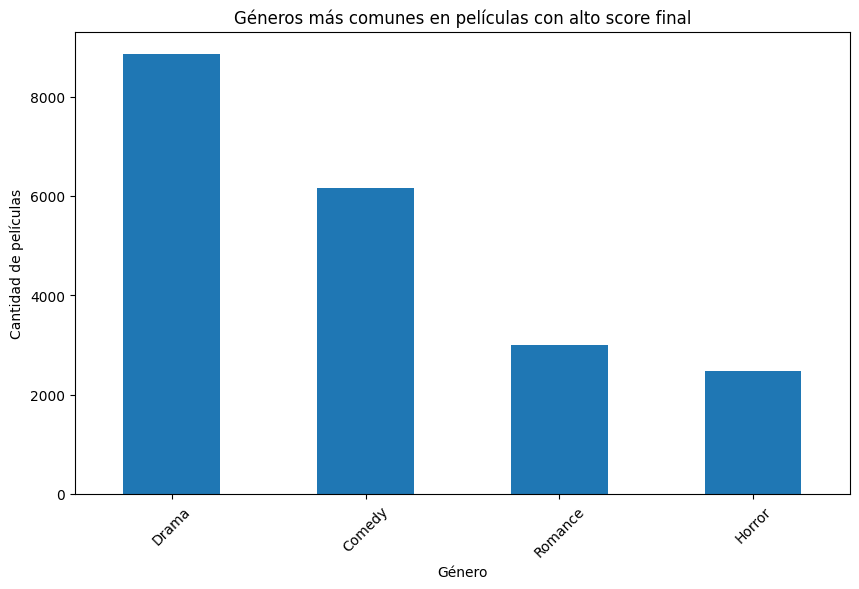

In [55]:
import matplotlib.pyplot as plt

# Establecer el umbral de score final
umbral_score = 8

# Filtrar las películas con alto score final
df_high_score = dfmerge[dfmerge['score_final'] > umbral_score]

# Obtener la suma de los géneros para las películas con alto score final
generos_suma = df_high_score[['Drama', 'Comedy', 'Horror', 'Romance']].sum()

# Ordenar los géneros por su frecuencia en orden descendente
generos_mas_comunes = generos_suma.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
generos_mas_comunes.plot(kind='bar')
plt.title('Géneros más comunes en películas con alto score final')
plt.xlabel('Género')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=45)
plt.show()


# ¿Existen correlaciones entre el género de una película y su score final?

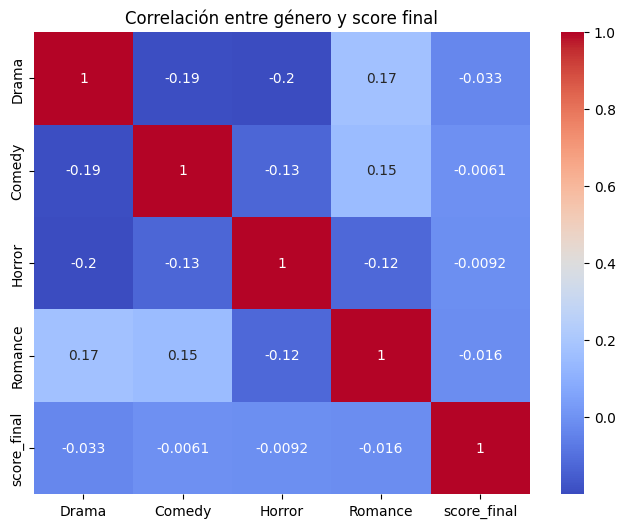

In [56]:
import seaborn as sns

# Calcular la matriz de correlación
corr_matrix = dfmerge[['Drama', 'Comedy', 'Horror', 'Romance', 'score_final']].corr()

# Generar un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre género y score final')
plt.show()


# ¿Cómo se distribuye el score final en los diferentes géneros de películas?

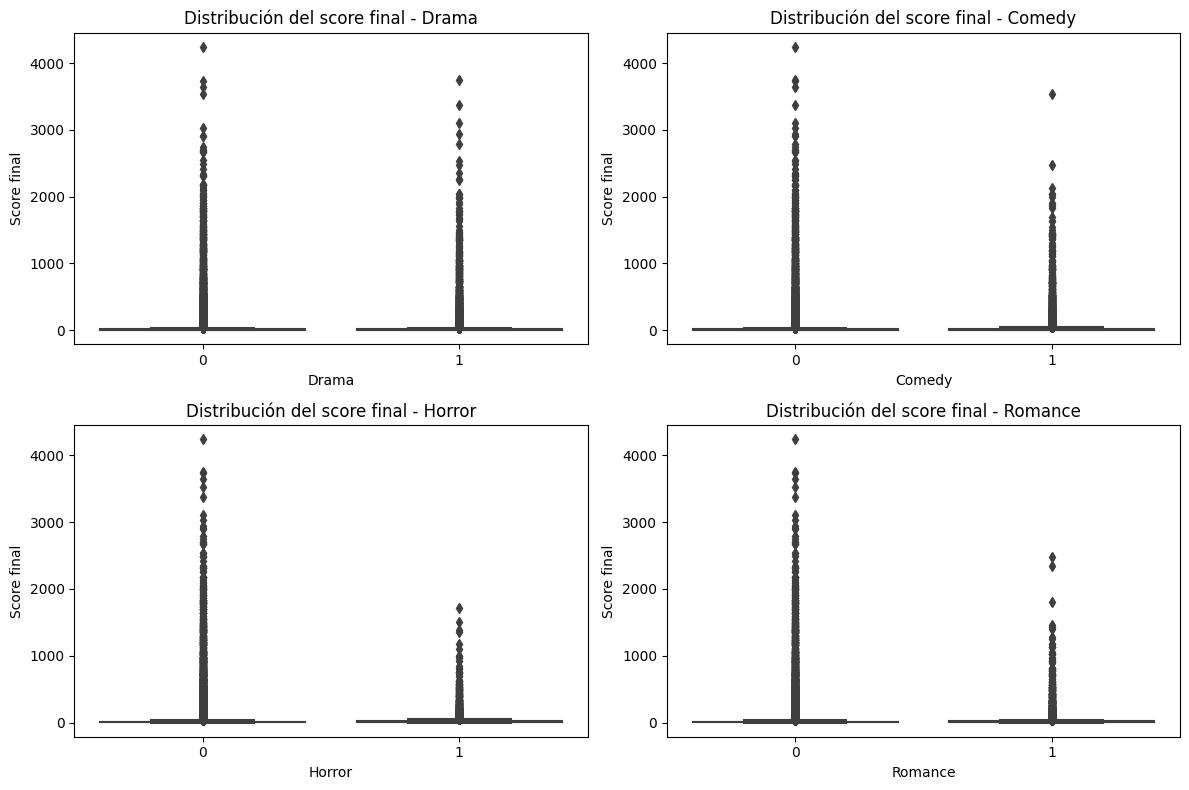

In [57]:
import matplotlib.pyplot as plt

# Crear subplots para cada género
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

# Generar los boxplots para cada género
genres = ['Drama', 'Comedy', 'Horror', 'Romance']
for i, genre in enumerate(genres):
    sns.boxplot(x=genre, y='score_final', data=dfmerge, ax=axes[i])
    axes[i].set_title(f'Distribución del score final - {genre}')
    axes[i].set_xlabel(genre)
    axes[i].set_ylabel('Score final')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()




# ¿Existen películas con géneros poco comunes pero que tienen un score final alto?



In [59]:
# Filtrar las películas con un score final alto
df_high_score = dfmerge[dfmerge['score_final'] > umbral_score]

# Filtrar las películas con géneros poco comunes
df_uncommon_genres = df_high_score[(df_high_score['Drama'] == 0) & (df_high_score['Comedy'] == 0) & (df_high_score['Horror'] == 0) & (df_high_score['Romance'] == 0)]

# Mostrar las películas con géneros poco comunes y score final alto
if not df_uncommon_genres.empty:
    print("Películas con géneros poco comunes y score final alto:")
    print(df_uncommon_genres[['id', 'title', 'score_final', 'Drama', 'Comedy', 'Horror', 'Romance']])
else:
    print("No se encontraron películas con géneros poco comunes y score final alto.")



Películas con géneros poco comunes y score final alto:
           id             title  score_final  Drama  Comedy  Horror  Romance
1        8844           Jumanji       735.17      0       0       0        0
8        9091      Sudden Death        57.02      0       0       0        0
9         710         GoldenEye       368.18      0       0       0        0
12      21032             Balto       135.81      0       0       0        0
14       1408  Cutthroat Island        47.02      0       0       0        0
...       ...               ...          ...    ...     ...     ...      ...
43332  104700               NaN        10.47      0       0       0        0
43406  395767               NaN        10.74      0       0       0        0
43413   44918               NaN        20.04      0       0       0        0
43435  460135               NaN         8.81      0       0       0        0
43502   49280               NaN         9.75      0       0       0        0

[3383 rows x 7 colum

# ¿Cuáles son los géneros más populares entre las películas con bajo score final?

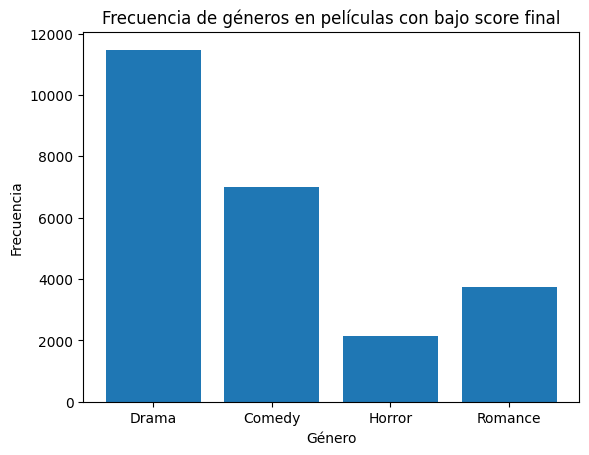

In [62]:
import matplotlib.pyplot as plt

# Filtrar las películas con bajo score final
df_low_score = dfmerge[dfmerge['score_final'] < umbral_score]

# Obtener la frecuencia de cada género
genre_counts = df_low_score[['Drama', 'Comedy', 'Horror', 'Romance']].sum()

# Crear un gráfico de barras
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de géneros en películas con bajo score final')
plt.show()



# ¿Cuál es la película con más calificaciones?¿Cuántas tiene?¿Y la que menos calificaciones tiene?

In [71]:
# Obtener el número de calificaciones por película
calificaciones_por_pelicula = dfmerge.groupby('id')['score_final'].count()

# Obtener el ID de la película con más calificaciones
pelicula_max_calificaciones = calificaciones_por_pelicula.idxmax()

# Obtener el número de calificaciones de la película con más calificaciones
max_calificaciones = calificaciones_por_pelicula.max()

# Obtener el ID de la película con menos calificaciones
pelicula_min_calificaciones = calificaciones_por_pelicula.idxmin()

# Obtener el número de calificaciones de la película con menos calificaciones
min_calificaciones = calificaciones_por_pelicula.min()

# Obtener el título de la película con más calificaciones
titulo_max_calificaciones = dfmerge[dfmerge['id'] == pelicula_max_calificaciones]['title'].iloc[0]

# Obtener el título de la película con menos calificaciones
titulo_min_calificaciones = dfmerge[dfmerge['id'] == pelicula_min_calificaciones]['title'].iloc[0]

# Imprimir los resultados
print("Película con más calificaciones:")
print(f"Título: {titulo_max_calificaciones}")
print(f"Número de calificaciones: {max_calificaciones}")

print("\nPelícula con menos calificaciones:")
print(f"Título: {titulo_min_calificaciones}")
print(f"Número de calificaciones: {min_calificaciones}")


Película con más calificaciones:
Título: Shara
Número de calificaciones: 81

Película con menos calificaciones:
Título: A Night in the Life of Jimmy Reardon
Número de calificaciones: 1
